### FFT

In [15]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]=10,10

In [2]:
# data import
data = tifffile.imread("data/uNSGFP_Ecadhtomato_t15_20171109_105301/MAX_uNSGFP_Ecadhtomato_t15_t0000_w0001.tif")

In [4]:
# chekcing the shape

x,y,z = data.shape
x,y,z

(38, 1024, 1024)

(<matplotlib.image.AxesImage at 0x10b7c9f28>,
 <matplotlib.colorbar.Colorbar at 0x10abf1048>)

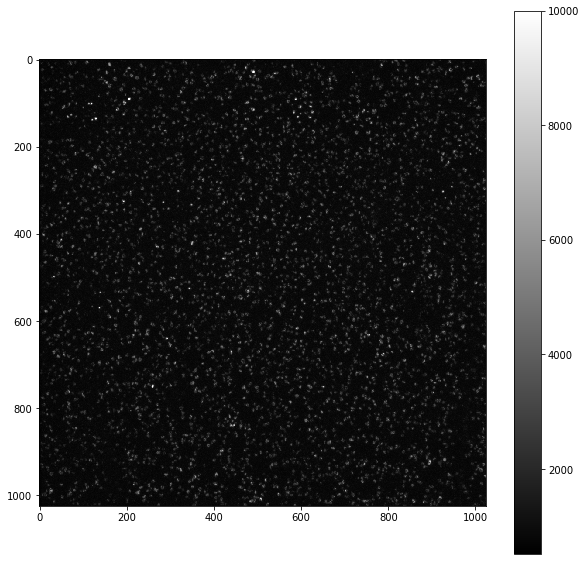

In [18]:
plt.imshow(data[1,:,:], cmap='gray', vmax= 10000), plt.colorbar()

In [20]:
F = np.fft.fft2(data[0,:,:])

In [27]:
Fabs = np.abs(F)

In [28]:
F.shape

(1024, 1024)

(<matplotlib.image.AxesImage at 0x10b622400>,
 <matplotlib.colorbar.Colorbar at 0x10c8a8400>)

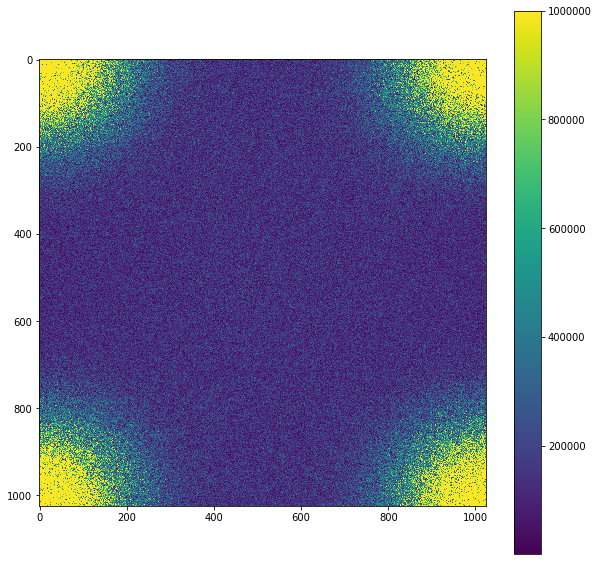

In [33]:
plt.imshow(Fabs, vmax=1e6), plt.colorbar()

In [238]:
# 2D FFT
data_fft=[]
for i in range(x):
    data_fft.append(np.fft.fft2(data[i,:,:]))
    
data_fft = np.array(data_fft)

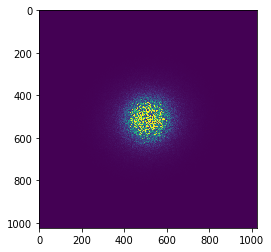

In [270]:
# spectrum
shiftedMeanAbs = np.abs(np.fft.fftshift(np.mean(data_fft*np.conj(data_fft), axis=0)))
plt.imshow(shiftedMeanAbs, vmax=1e13)

In [286]:
a1 = data_fft[0]*np.conj(data_fft[0])

In [287]:
a2 = a1 -np.mean(a1)

In [288]:
a2.shape

(1024, 1024)

In [291]:
np.min(a2)

(-1505787552454.6812+0j)

In [12]:
# radial profile

import numpy as np

def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

In [250]:
def crossCorrAvg(data, tau=1):
    upLim = data.shape[0]
    if (tau!=0):
        upLim = data.shape[0]//tau  - 1
    aux = np.array([data[i]*np.conj(data[i+tau]) for i in range(0,upLim,tau+1)])
    return np.abs(np.mean(np.fft.fftshift(aux), axis=0))
    

In [257]:
def crossCorrAvgWOOffset(data, tau=1):
    upLim = data.shape[0]
    if (tau!=0):
        upLim = data.shape[0]//tau  - 1
    aux = np.array([data[i]*np.conj(data[i+tau]) - np.mean(np.ravel(data[i]*np.conj(data[i+tau]))) for i in range(0,upLim,tau+1)])
    return np.abs(np.mean(np.fft.fftshift(aux), axis=0))
    

In [268]:
c0 = crossCorrAvg(np.reshape(data[0],[1,1024,1024]))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [269]:
c0.shape

()

In [252]:
center = np.array([data.shape[1], data.shape[2]])/2

def rps(data):
    profiles = []
    for tau in range(data.shape[0]//2):
        cc = crossCorrAvgWOOffset(data_fft, tau=tau)
        rp = radial_profile(cc,center)
        profiles.append(rp)
    return np.array(profiles)

In [253]:
profs = rps(data_fft)

In [254]:
profs.shape

(19, 725)

In [255]:
0.5*profs.shape[1], 0.5*profs[0].max()

(362.5, 6.0767714989338867e+17)

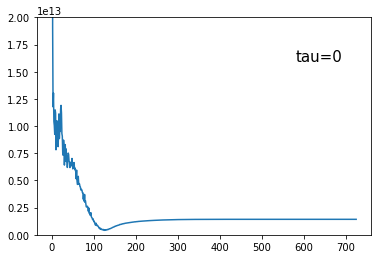

In [256]:
import pylab as pl
from IPython import display
import time
%matplotlib inline



def plotProfileTimelapse(data,i, yLim=1e13):
    
#     print(xt,yt)
    plt.clf()
#     yLim = 1e13
    plt.ylim(0,yLim)
    
    xt, yt = (0.8*data.shape[1], 0.8*yLim)
    
    plt.plot(data[i])
    plt.text(xt, yt, 'tau=' +str(i), fontsize=15)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1.0)
    
for i in range(1):
    plotProfileTimelapse(profs, i, yLim=2e13)
    
plt.close()

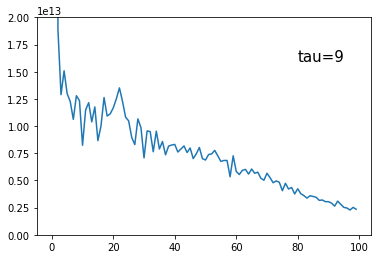

In [249]:
for i in range(10):
    plotProfileTimelapse(profs[:,0:100], i, yLim=2*1e13)
plt.close()

In [150]:
line = data[0,512,:]

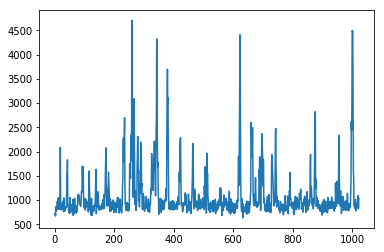

In [151]:
plt.plot(line)

In [152]:
lineFFT = np.fft.fft(line)

In [153]:
lineFFTAbs = np.abs(lineFFT)

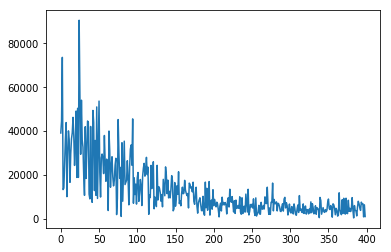

In [154]:
plt.plot(lineFFTAbs[1:400])

In [83]:
product = lineFFT*np.conj(lineFFT)

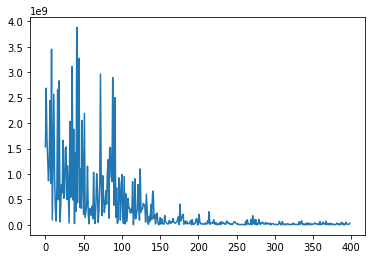

In [122]:
plt.plot(np.abs(product)[1:400])

In [123]:
img = data[0]

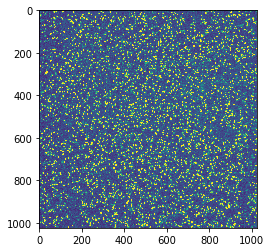

In [128]:
plt.imshow(img, vmax=2000)

In [131]:
imgFFT = np.fft.fftshift(np.fft.fft2(img))

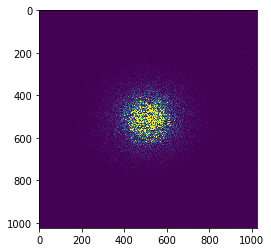

In [135]:
plt.imshow(np.abs(imgFFT*np.conj(imgFFT)), vmax=1e13)

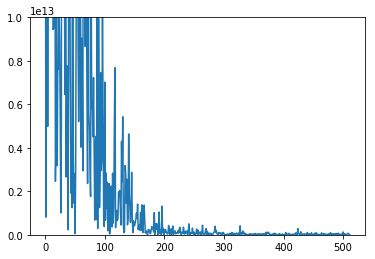

In [148]:
plt.ylim(0,1e13)
plt.plot(np.abs(imgFFT*np.conj(imgFFT))[514,512:])

In [137]:
rrr = radial_profile(np.abs(imgFFT*np.conj(imgFFT)), [512,512])

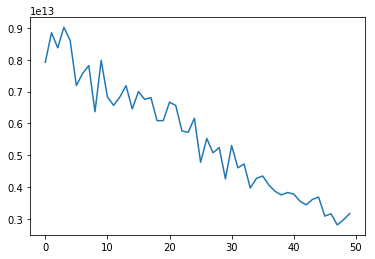

In [139]:
plt.plot(rrr[50:100])

In [225]:
# dummySignal = np.zeros(1024)
x = np.arange(1024)
dummySignal = np.zeros(1024)
# sigma=10
# mu=900
# dummySignal = np.exp(-(x-mu)**2/(2*sigma**2))

In [226]:
sigma=20
mu=900

dummySignal +=np.exp(-(x-mu)**2/(2*sigma**2))

In [227]:
# left=900
# right=1000
# dummySignal[left:right] = np.ones(right-left)

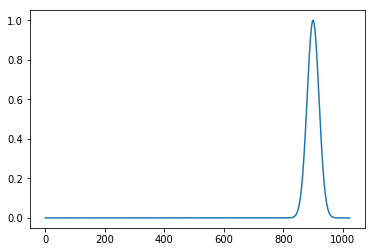

In [228]:
plt.plot(dummySignal)

In [229]:
dummyFFT = np.fft.fft(dummySignal)

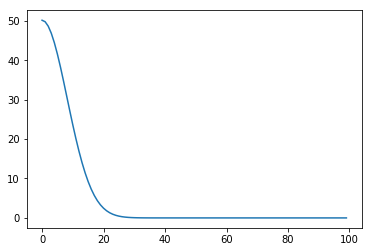

In [230]:
plt.plot(np.abs(dummyFFT)[0:100])

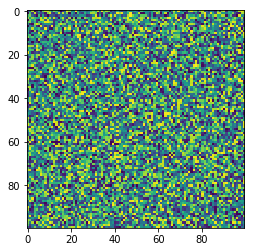

In [45]:
plt.imshow(d)

In [46]:
rd = radial_profile(d, np.array([50,50]))

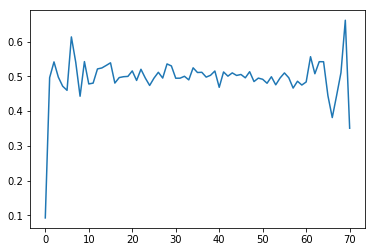

In [47]:
plt.plot(rd)

In [48]:
50*np.sqrt(2)

70.710678118654755

In [49]:
rd.shape

(71,)

In [ ]:
## import gputools

In [16]:
xx = np.arange(-9,10,1)
sigma = 4.0

In [17]:
ga = np.exp(-xx*xx/(2*sigma*sigma))

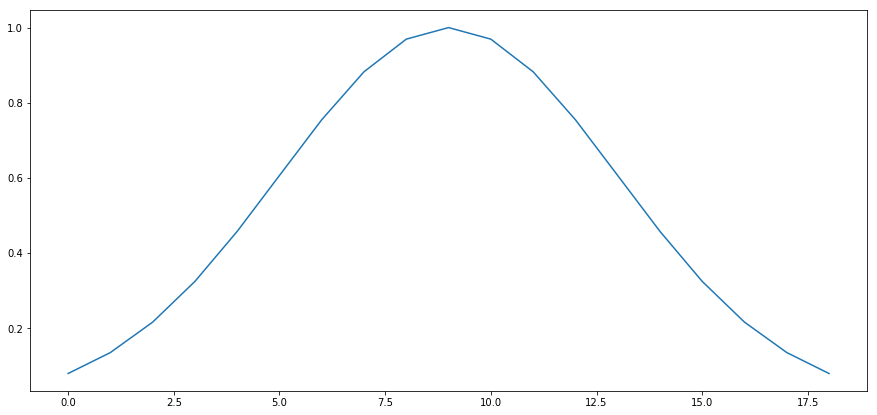

In [18]:
plt.plot(ga)

In [161]:
sm = gputools.convolve(img[0,:], ga)

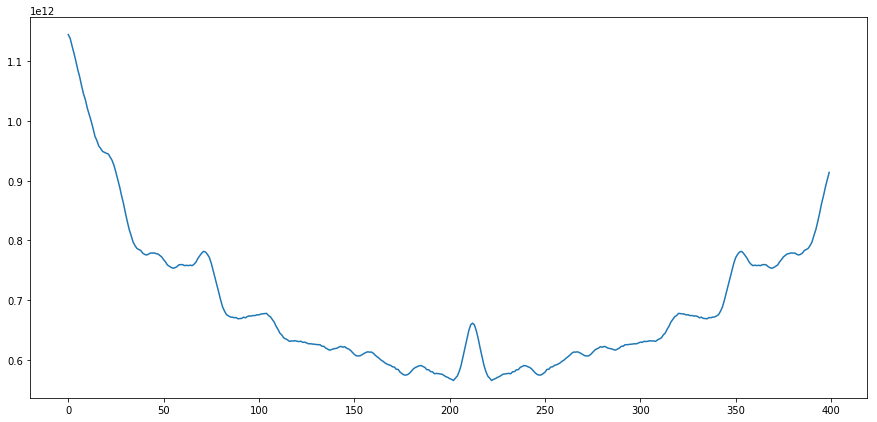

In [162]:
# axes = plt.gca()
# axes.set_ylim([0,1e14])
plt.plot(sm[300:700])

In [169]:
def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = nr #tbin / nr
    return radialprofile 

In [170]:
img_crop = img[0:512,0:512]

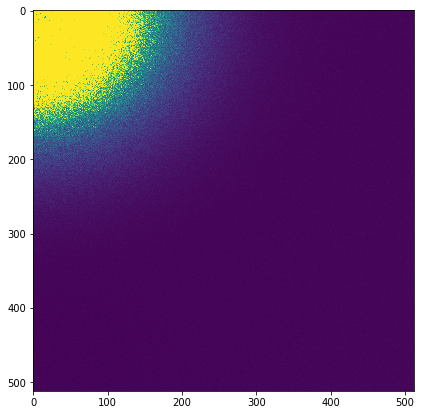

In [171]:
plt.imshow(img_crop, vmax=1e12)

In [172]:
center = np.array([0,0])

In [173]:
r = radial_profile(img_crop,center)

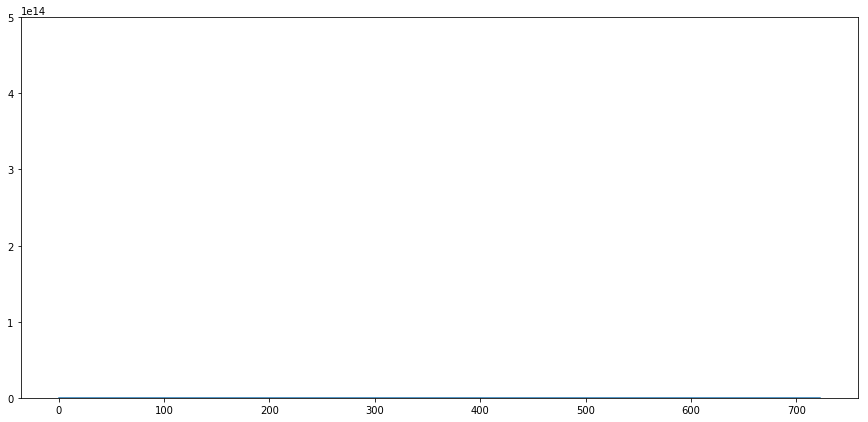

In [176]:
axes = plt.gca()
axes.set_ylim([2*1e10,5*1e12])
plt.plot(r)

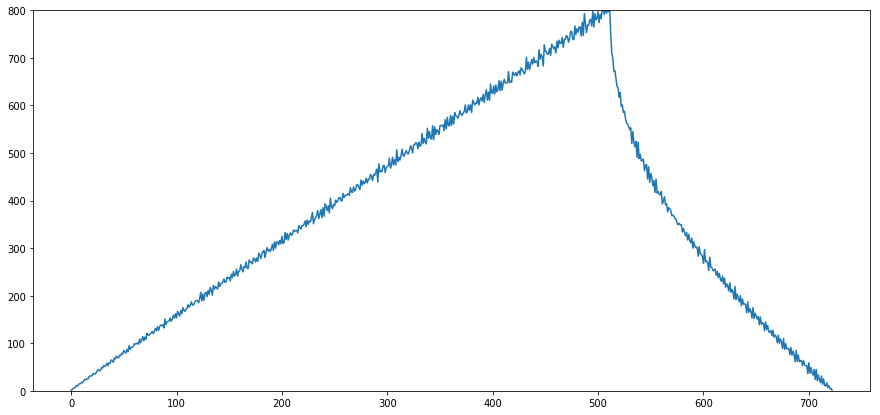

In [180]:
axes = plt.gca()
axes.set_ylim([0,800])
plt.plot(r)

In [179]:
r.max()

809

In [27]:
wing3 = tifffile.imread("../../data/franz/149_8bit/149_fused_normalized.tif")

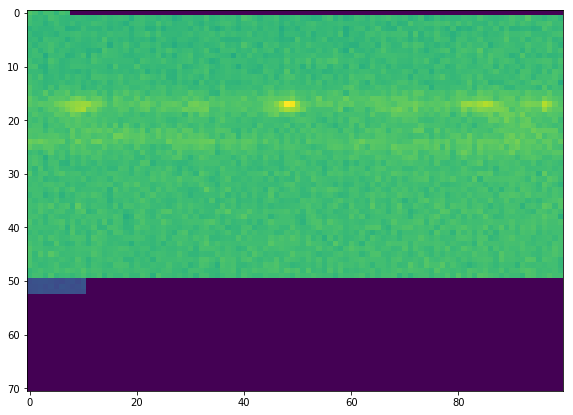

In [31]:
zx= np.mean(wing3[:,990:1010,700:800], axis=1)
plt.imshow(zx)

In [41]:
ind = np.indices((32,22))

In [42]:
ind

array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ..., 
        [29, 29, 29, ..., 29, 29, 29],
        [30, 30, 30, ..., 30, 30, 30],
        [31, 31, 31, ..., 31, 31, 31]],

       [[ 0,  1,  2, ..., 19, 20, 21],
        [ 0,  1,  2, ..., 19, 20, 21],
        [ 0,  1,  2, ..., 19, 20, 21],
        ..., 
        [ 0,  1,  2, ..., 19, 20, 21],
        [ 0,  1,  2, ..., 19, 20, 21],
        [ 0,  1,  2, ..., 19, 20, 21]]])

In [45]:
ind.shape

(2, 32, 22)